In [24]:
import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [27]:
df = pd.read_csv(os.path.join('rsc', 'data', 'creditcard.csv'))
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Imported!')

Imported!


In [29]:
100*df['Class'].value_counts() / df.shape[0]

0    99.827251
1     0.172749
Name: Class, dtype: float64

### Data base content
- Transactions made by credit cards European cardholders.
- During 2 days in September 2013
- A total of 284,807 transactions
- 492 frauds recorded (0.172%)
- 

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [30]:
df[df['Class']==1]['Amount'].max()

2125.87

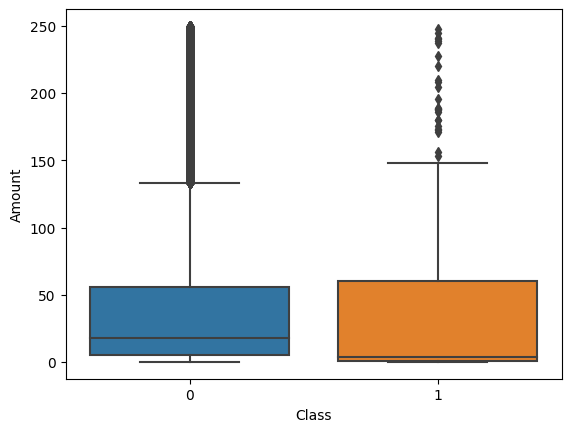

In [31]:
sns.boxplot(data=df[df["Amount"]<250], x="Class", y="Amount")
plt.show()

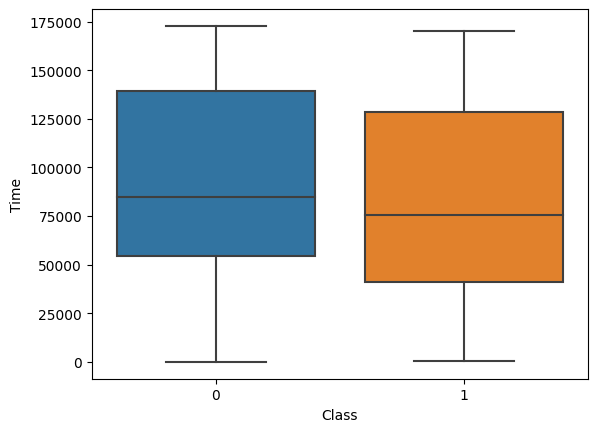

In [32]:
sns.boxplot(data=df, x="Class", y="Time")
plt.show()

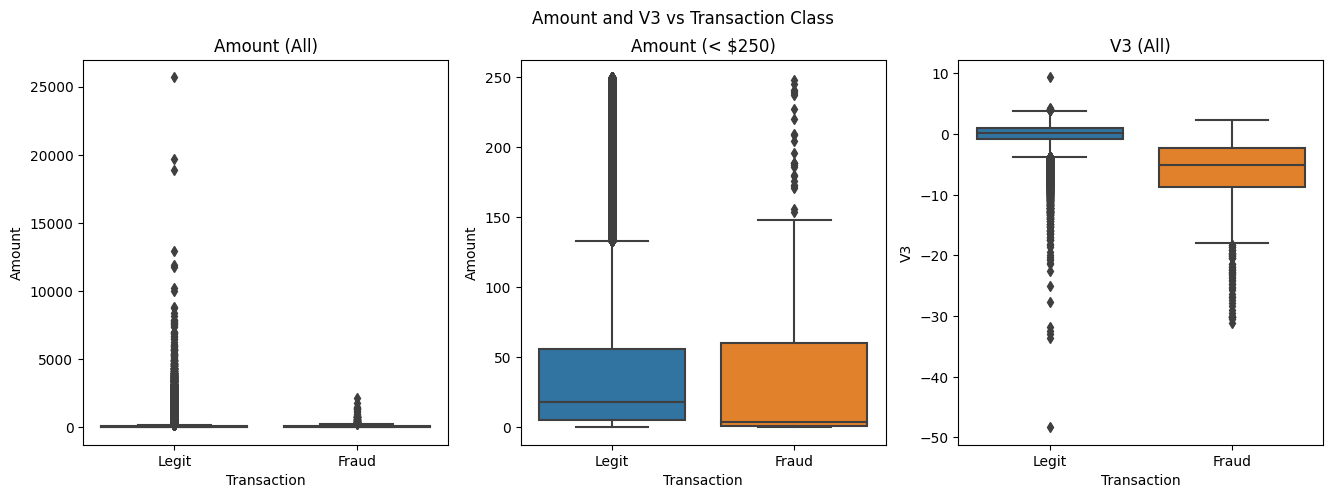

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
sns.boxplot(data=df, x="Class", y="Amount", ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Legit', 'Fraud'])
axes[0].set_xlabel('Transaction')
axes[0].set_title('Amount (All)')


sns.boxplot(data=df[df["Amount"]<250], x="Class", y="Amount", ax=axes[1])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Legit', 'Fraud'])
axes[1].set_xlabel('Transaction')
axes[1].set_title('Amount (< $250)')

sns.boxplot(data=df, x="Class", y="V3", ax=axes[2])
axes[2].set_xticklabels(['Legit', 'Fraud'])
axes[2].set_xlabel('Transaction')
axes[2].set_title('V3 (All)')

plt.suptitle("Amount and V3 vs Transaction Class")

fig.savefig(os.path.join("outputs", "images", "figure_1.png"))

plt.show()

In [34]:
# just for playing
def divide(num: float, divider: float, dec=2):
    if num <= 0:
        return 0
    # if num < divider:
    #     return divide(num=num*10-divider, divider=divider, dec=dec)
    
    if num >= divider:
        memo[num] = 1+divide(num=num-divider, divider=divider, dec=dec)
        return memo[num]

In [35]:
from typing import Union
def QQ_compare(data1: Union[list, pd.Series], data2: Union[list, pd.Series]):
    """
    This function check if the Q3 of data1 est < Q1 of data2
    OR
    if Q1 of data1 is > Q3 of data2
    """
    
    Q1_1, Q3_1 = list(np.percentile(data1, [25, 75]))
    Q1_2, Q3_2 = list(np.percentile(data2, [25, 75]))
    
    # if the Q3 of data1 est < Q1 of data2
    if Q3_1 < Q1_2:
        return True
    # if Q1 of data1 is > Q3 of data2
    if Q1_1 > Q3_2:
        return True
    
    return False

In [36]:
print("List of variables with an high potential in predicting fraudulant transactions")
rk = 0
list_cols_high_potential = []
for col in df.columns[0:-1]:
    tmp_df = df#[df["Amount"]<250]
    dt1 = tmp_df[tmp_df['Class']==0][col]
    dt2 = tmp_df[tmp_df['Class']==1][col]
    QQ_result = QQ_compare(data1=dt1, data2=dt2)
    
    if QQ_result:
        rk += 1
        print(f"{rk}: {col}")
        list_cols_high_potential.append(col)
    
list_cols_high_potential

List of variables with an high potential in predicting fraudulant transactions
1: V2
2: V3
3: V4
4: V7
5: V9
6: V10
7: V11
8: V12
9: V14
10: V16
11: V17


['V2', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']

### Scatter plots

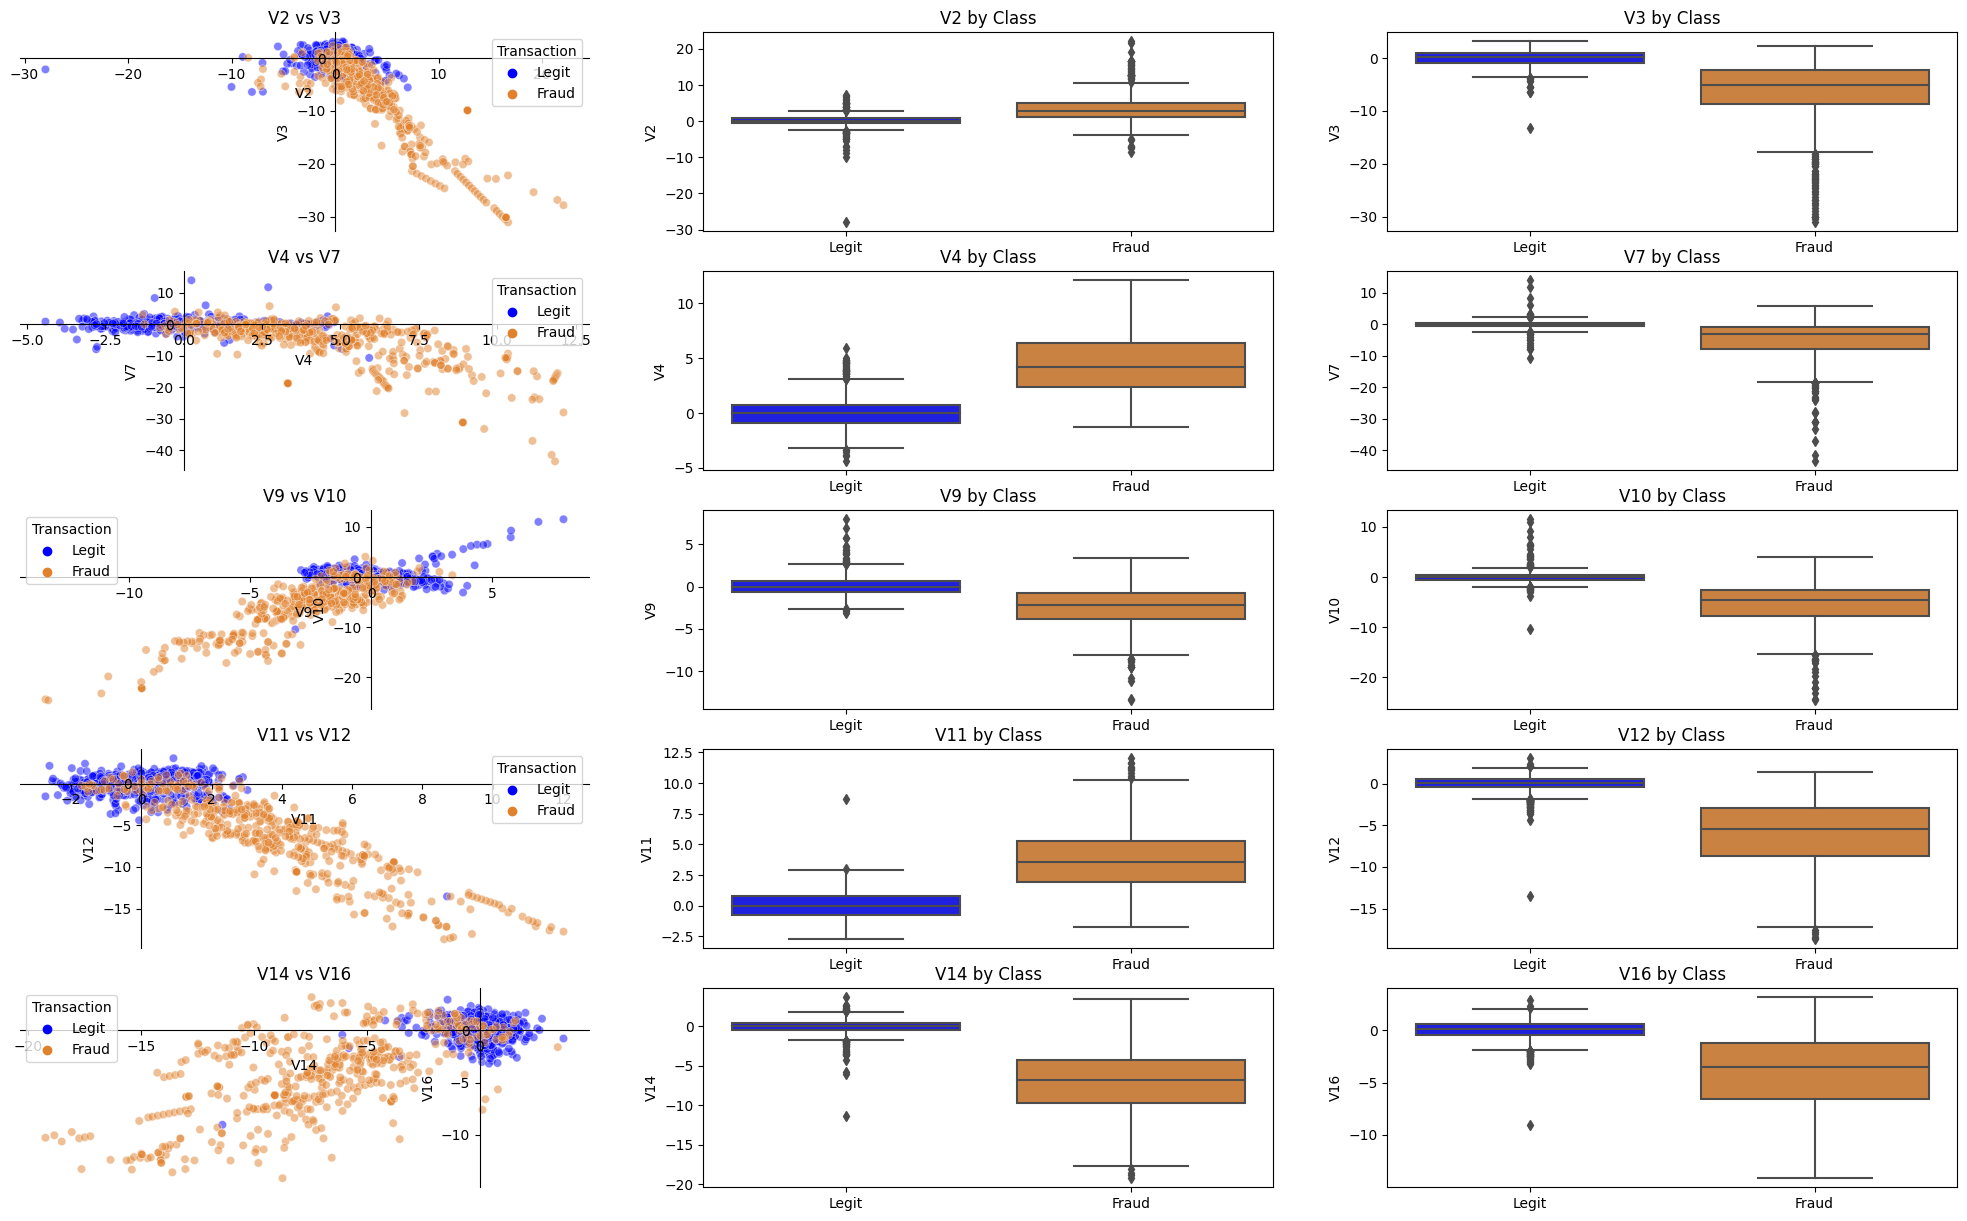

In [37]:
feats_cols = df.columns[:-1].to_list()
# feats_cols = feats_cols[0:5]
feats_cols = list_cols_high_potential  # [0:5]

fraud_set = df[df['Class']==1]
legit_set = df[df['Class']==0].sample(1000)
new_plt_data = pd.concat([legit_set]+[fraud_set], axis = 0)

fig, axs = plt.subplots(int(len(feats_cols)/2), 3, figsize=(25,15))  # , gridspec_kw={'height_ratios': [1, 2]}

i=0
_colors = ['blue', '#E1812C']
_labels = ['Legit', 'Fraud']
for fst_ftr in range(0, len(feats_cols)-1, 2):
    snd_ftr = fst_ftr + 1
    feat1 = feats_cols[fst_ftr]
    feat2 = feats_cols[snd_ftr]
    
    # ------------------- axe first col
    axs[i][0].spines['left'].set_position('zero')
    axs[i][0].spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    axs[i][0].spines['right'].set_color('none')
    axs[i][0].spines['top'].set_color('none')

    cht = sns.scatterplot(data=new_plt_data, x=feat1, y=feat2, hue='Class', palette=_colors, alpha=.5, ax=axs[i][0])
    axs[i][0].set_title(f'{feat1} vs {feat2}')
    
    handles, _ = cht.get_legend_handles_labels()
    axs[i][0].legend(handles, _labels, title='Transaction')
    
    # ------------------- axe 2nd col
    sns.boxplot(data=new_plt_data, x="Class", y=feat1, palette=_colors, ax=axs[i][1])
    axs[i][1].set_xticks([0, 1])
    axs[i][1].set_xticklabels(['Legit', 'Fraud'])
    axs[i][1].set_xlabel('')
    axs[i][1].set_title(f'{feat1} by Class')
    
    # ------------------- axe 3rd col
    sns.boxplot(data=new_plt_data, x="Class", y=feat2, palette=_colors, ax=axs[i][2])
    axs[i][2].set_xticks([0, 1])
    axs[i][2].set_xticklabels(['Legit', 'Fraud'])
    axs[i][2].set_xlabel('')
    axs[i][2].set_title(f'{feat2} by Class')
    
    
    i += 1
    
plt.show()

fig.savefig(os.path.join("outputs", "images", "figure_2.png"))

### Examining features with least discrimination potential

In [38]:
df_copy = df.copy(deep=True)

In [39]:
list_cols_low_potential = [col for col in df.columns[0:-1] if col not in list_cols_high_potential]
print(f"{len(list_cols_low_potential)}: {list_cols_low_potential}")

19: ['Time', 'V1', 'V5', 'V6', 'V8', 'V13', 'V15', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


# We get new Features with high potential for:
- V21_2 = 1/V21**2
- V27_2 = 1/V27**8


In [40]:
new_list_cols_low_potential = []
for col in list_cols_low_potential:
    new_col = f'{col}_2'
    df_copy[f'{col}_2'] = 1/(df_copy[col]**2)
    # df_copy[new_col] = np.log10(df_copy[col])
    new_list_cols_low_potential.append(new_col)
    
rk = 0
new_list_cols_high_potential = []
for col in new_list_cols_low_potential:
    tmp_df = df_copy#[df["Amount"]<250]
    dt1 = tmp_df[tmp_df['Class']==0][col]
    dt2 = tmp_df[tmp_df['Class']==1][col]
    QQ_result = QQ_compare(data1=dt1, data2=dt2)
    
    if QQ_result:
        rk += 1
        print(f"{rk}: {col}")
        new_list_cols_high_potential.append(col)
    
new_list_cols_high_potential

1: V21_2
2: V27_2


['V21_2', 'V27_2']

In [16]:
new_list_cols_high_potential

['V21_2', 'V27_2']

In [17]:
index_new_list_cols_high_potential = [list(df.columns).index(cl.split('_')[0]) for cl in new_list_cols_high_potential]
index_new_list_cols_high_potential

[21, 27]

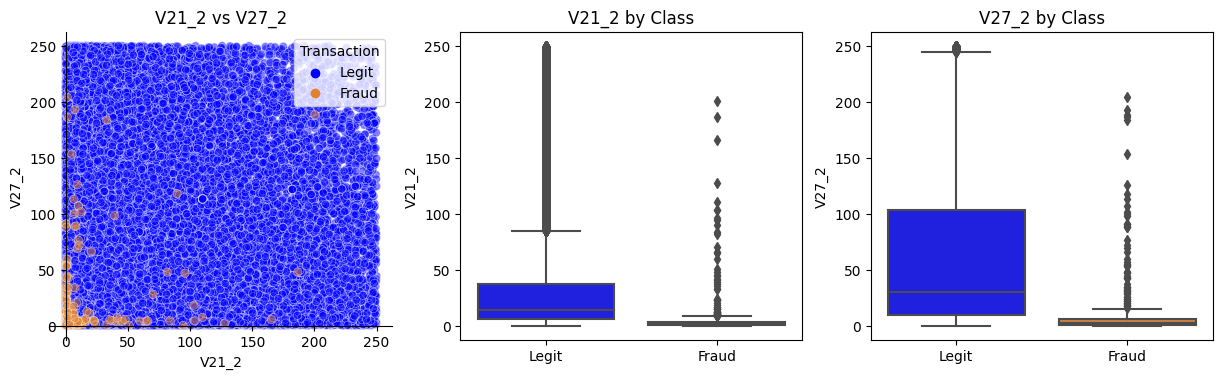

In [41]:
feats_cols = new_list_cols_high_potential

fraud_set = df_copy[df_copy['Class']==1]
legit_set = df_copy[df_copy['Class']==0]#.sample(1000)
new_plt_data = pd.concat([legit_set]+[fraud_set], axis = 0)
new_plt_data = new_plt_data[(new_plt_data['V21_2']<250) & (new_plt_data['V27_2']<250)]
# new_plt_data = new_plt_data.sample(n=10_000)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # , gridspec_kw={'height_ratios': [1, 2]}

i=0
_colors = ['blue', '#E1812C']
_labels = ['Legit', 'Fraud']
for fst_ftr in range(0, len(new_list_cols_high_potential)-1, 2):
    snd_ftr = fst_ftr + 1
    feat1 = new_list_cols_high_potential[fst_ftr]
    feat2 = new_list_cols_high_potential[snd_ftr]
    
    # ------------------- axe first col
    axs[0].spines['left'].set_position('zero')
    axs[0].spines['bottom'].set_position('zero')

    # Eliminate upper and right axes
    axs[0].spines['right'].set_color('none')
    axs[0].spines['top'].set_color('none')

    cht = sns.scatterplot(data=new_plt_data, x=feat1, y=feat2, hue='Class', palette=_colors, alpha=.5, ax=axs[0])
    axs[0].set_title(f'{feat1} vs {feat2}')
    
    handles, _ = cht.get_legend_handles_labels()
    axs[0].legend(handles, _labels, title='Transaction')
    
    # ------------------- axe 2nd col
    sns.boxplot(data=new_plt_data, x="Class", y=feat1, palette=_colors, ax=axs[1])
    axs[1].set_xticks([0, 1])
    axs[1].set_xticklabels(['Legit', 'Fraud'])
    axs[1].set_xlabel('')
    axs[1].set_title(f'{feat1} by Class')
    
    # ------------------- axe 3rd col
    sns.boxplot(data=new_plt_data, x="Class", y=feat2, palette=_colors, ax=axs[2])
    axs[2].set_xticks([0, 1])
    axs[2].set_xticklabels(['Legit', 'Fraud'])
    axs[2].set_xlabel('')
    axs[2].set_title(f'{feat2} by Class')
    
    
    i += 1
    
plt.show()

fig.savefig(os.path.join("outputs", "images", "figure_3.png"))

### Functions

In [42]:
all_models_performance = pd.DataFrame(
    columns=["No",
             "Model_Name", 
             "Acc", 
             "AUC", 
             "Legit_Precision", 
             "Fraud_Precision", 
             "Legit_Recal", 
             "Fraud_Recal",
             "Legit_f1_Score",
             "Fraud_f1_Score",
             "Legit_Sample_Size",
             "Fraud_Sample_Size",
             "Total_Sample_Size"
            ])
def add_to_performance(numb, model_pipe, _model_name, _x_test, _y_test, _data, _all_models_performance_df):
    
    _y_pred = model_pipe.predict(_x_test)
    _acc = metrics.accuracy_score(_y_test, _y_pred)
    _auc = roc_auc_score(_y_test, _y_pred)

    _report = metrics.precision_recall_fscore_support(_y_test, _y_pred)
    
    _legit_precision, _fraud_precision = _report[0]
    _legit_precision, _fraud_precision = round(_legit_precision, 2), round(_fraud_precision, 2)
    
    _legit_recal, _fraud_recal = _report[1]
    _legit_recal, _fraud_recal = round(_legit_recal, 2), round(_fraud_recal, 2)
    
    _legit_f1_score, _fraud_f1_score = _report[2]
    _legit_f1_score, _fraud_f1_score = round(_legit_f1_score, 2), round(_fraud_f1_score, 2)
    
    _legit_sample_size, _fraud_sample_size = sum(_data['Class']==0), sum(_data['Class']==1)
    
    _total_sample_size = _legit_sample_size + _fraud_sample_size
    
    all_m_p = _all_models_performance_df.copy()
    
    if numb in all_m_p['No'].tolist():
        all_m_p.loc[all_m_p['No']==numb, 'Model_Name'] = _model_name
        all_m_p.loc[all_m_p['No']==numb, 'Acc'] = _acc
        all_m_p.loc[all_m_p['No']==numb, 'AUC'] = _auc
        all_m_p.loc[all_m_p['No']==numb, 'Legit_Precision'] = _legit_precision
        all_m_p.loc[all_m_p['No']==numb, 'Fraud_Precision'] = _fraud_precision
        all_m_p.loc[all_m_p['No']==numb, 'Legit_Recal'] = _legit_recal
        all_m_p.loc[all_m_p['No']==numb, 'Fraud_Recal'] = _fraud_recal
        all_m_p.loc[all_m_p['No']==numb, 'Legit_f1_Score'] = _legit_f1_score
        all_m_p.loc[all_m_p['No']==numb, 'Fraud_f1_Score'] = _fraud_f1_score
        all_m_p.loc[all_m_p['No']==numb, 'Legit_Sample_Size'] = _legit_sample_size
        all_m_p.loc[all_m_p['No']==numb, 'Fraud_Sample_Size'] = _fraud_sample_size
        all_m_p.loc[all_m_p['No']==numb, 'Total_Sample_Size'] = _total_sample_size
        
        
        print(f"Model {numb} performance updated.")
    else:
        new_model = [[numb, _model_name, _acc, _auc, _legit_precision, _fraud_precision, _legit_recal, _fraud_recal, _legit_f1_score, _fraud_f1_score, _legit_sample_size, _fraud_sample_size, _total_sample_size]]
        new_model = pd.DataFrame(new_model, columns=all_m_p.columns)

        all_m_p = all_m_p.append(new_model, ignore_index = True)
    
        print("New performance added.")
    
    return all_m_p
all_models_performance

,No,Model_Name,Acc,AUC,Legit_Precision,Fraud_Precision,Legit_Recal,Fraud_Recal,Legit_f1_Score,Fraud_f1_Score,Legit_Sample_Size,Fraud_Sample_Size,Total_Sample_Size


## Import Estimators

In [20]:
#!pip install --upgrade tensorflow

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

# import tensorflow
# from tensorflow import keras
# from tensorflow.keras import models
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras import utils
# from tensorflow.keras import optimizers

# # Set random seed for reproducability
# tensorflow.random.set_seed(0)

# print("Libraries imported.")
# print('Keras version:',keras.__version__)
# print('TensorFlow version:',tensorflow.__version__)


from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn import metrics
from functools import partial


from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

print("Estimators imported!")

Estimators imported!


In [22]:
def custom_transform(X, col_index_list: list):
    """
    if col_index_list = [] then all columns will be used
    """
    if not len(col_index_list) :
        scar_X = np.power(X, 2)
        
        with np.errstate(divide='ignore'):
            inv_scar_X = np.where(X != 0, 1 / X, X)
        X_new = np.concatenate([X, inv_scar_X], axis=1)
        
        return X_new
    else:
        X_new = X
        nbr_rws = X.shape[0]
        for col_ind in col_index_list:
            scar_X = np.power(X[:, col_ind], 2)
            scar_X = scar_X.reshape(nbr_rws, 1)
            
            with np.errstate(divide='ignore'):
                inv_scar_X = np.where(scar_X != 0, 1 / scar_X, scar_X)
            X_new = np.concatenate([X_new, inv_scar_X], axis=1)
        
        return X_new

## 1. Using dataset as it is (unbalanced)

Split train test

In [95]:
# preprocess the data
target_classes = ['Legit', 'Fraud']
# data.dropna(inplace=True) # remove rows with missing values
data = df[df.Class.isin([0, 1])]  # remove rows with invalid decision values
features = data.columns[0:-1]
label = 'Class'
categorical_columns = []
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(data[features].values,
                                                    data[label].values,
                                                    test_size=0.30,
                                                    random_state=0,
                                                    stratify=data[label].values)  # stratify: Makes train and test set have same proportion of values in data[label]

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print(f"There is (are) {np.sum(y_test)} fraud(s) in the test set")
print("Sample of features and labels:")

numeric_features_col_ind = [list(features).index(col) for col in features if col not in categorical_columns]
category_features_col_ind = [list(features).index(col) for col in categorical_columns]

print('Ready...')

Training Set: 199364, Test Set: 85443 

There is (are) 148 fraud(s) in the test set
Sample of features and labels:
Ready...


### A. Logistic regression

Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.53      0.64       148

    accuracy                           1.00     85443
   macro avg       0.91      0.76      0.82     85443
weighted avg       1.00      1.00      1.00     85443



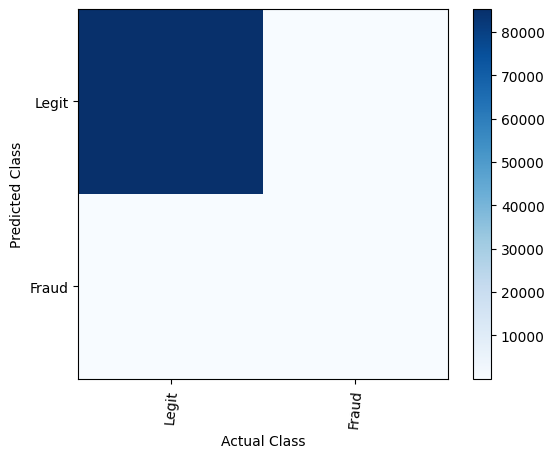

In [96]:
# Create a ColumnTransformer with the OneHotEncoder pipeline
column_transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), numeric_features_col_ind),
])


custom_transform_partial = partial(custom_transform, col_index_list=index_new_list_cols_high_potential)

# create a pipeline
lg_pipe = Pipeline([
    ('transform', FunctionTransformer(custom_transform_partial)),
    ('column_transformer', column_transformer),  
    ('lg', LogisticRegression(tol=0.0001, max_iter=1000)),  # criterion='gini',max_depth=5,random_state=1
])


# set parameters of the estimators in a pipeline
lg_param_grid = [
    {'lg__C':[1, 1/10, 1/100, 1/1000], 
     'lg__solver':['liblinear','newton-cg', 'lbfgs', 'sag', 'saga']}
]

# Apply GridSearch on the pipeline
lg_gs = GridSearchCV(lg_pipe, param_grid=lg_param_grid)


# train the model
lg_gs.fit(x_train, y_train)

lg_model_pipe = lg_gs.best_estimator_

# evaluate the model
# Print the accuracy
y_pred = lg_model_pipe.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

report = metrics.classification_report(y_test, y_pred)
print(report)
# plot_confusion_matrix(true_labels, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(target_classes))
plt.xticks(tick_marks, target_classes, rotation=85)
plt.yticks(tick_marks, target_classes)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

max_fraud_recal: 0.66, thres_prob_max_fraud_recal: 0.1, max_fraud_recal_auc: 0.8275913245445456
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.66      0.73       148

    accuracy                           1.00     85443
   macro avg       0.92      0.83      0.87     85443
weighted avg       1.00      1.00      1.00     85443



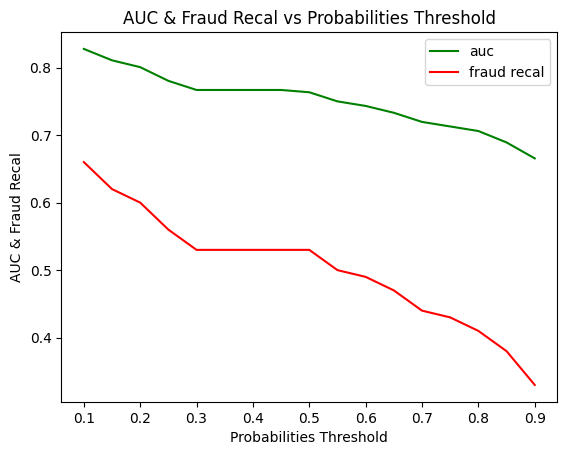

In [168]:
# Get class probability scores
predict_prob = lg_model_pipe.predict_proba(x_test)

list_thres_prob = [i / 100 for i in range(10, 91, 5)]
list_auc = []
list_fraud_recal = []

max_fraud_recal = 0
thres_prob_max_fraud_recal = None
max_fraud_recal_auc = 0
y_pred_max_fraud_recal = None

for thres_prob in list_thres_prob:
    y_pred = (predict_prob >= thres_prob).astype(int)  # convert probabilities to binary labels based on threshold
    y_pred = [i[1] for i in y_pred]  # 1 is for fraud. In the y_pred there are pairs of probabilities and the second one (index 1) is for fraud; that's why we have i[1]

    # To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
    auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
    
    _report = metrics.precision_recall_fscore_support(y_test, y_pred)
    
    _legit_precision, _fraud_precision = _report[0]
    _legit_precision, _fraud_precision = round(_legit_precision, 2), round(_fraud_precision, 2)
    
    _legit_recal, _fraud_recal = _report[1]
    _legit_recal, _fraud_recal = round(_legit_recal, 2), round(_fraud_recal, 2)
    
    # _legit_f1_score, _fraud_f1_score = _report[2]
    # _legit_f1_score, _fraud_f1_score = round(_legit_f1_score, 2), round(_fraud_f1_score, 2)
    
    list_auc.append(auc)
    list_fraud_recal.append(_fraud_recal)
    
    
    if _fraud_recal > max_fraud_recal:
        max_fraud_recal = _fraud_recal
        thres_prob_max_fraud_recal = thres_prob
        max_fraud_recal_auc = auc
        
print(f"max_fraud_recal: {max_fraud_recal}, thres_prob_max_fraud_recal: {thres_prob_max_fraud_recal}, max_fraud_recal_auc: {max_fraud_recal_auc}")

y_pred = (predict_prob >= thres_prob_max_fraud_recal).astype(int)  # convert probabilities to binary labels based on threshold
y_pred = [i[1] for i in y_pred]  # 1 is for fraud. In the y_pred there are pairs of probabilities and the second one (index 1) is for fraud; that's why we have i[1]

report = metrics.classification_report(y_test, y_pred)
print(report)

# Plot the ROC chart
plt.plot(list_thres_prob, list_auc, linestyle='-',color='green', label="auc")
plt.plot(list_thres_prob, list_fraud_recal, linestyle='-',color='red', label="fraud recal")
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('AUC & Fraud Recal vs Probabilities Threshold')
plt.xlabel('Probabilities Threshold')
plt.ylabel('AUC & Fraud Recal')
plt.legend(loc='best')
plt.show()


Average AUC: 0.8275913245445456


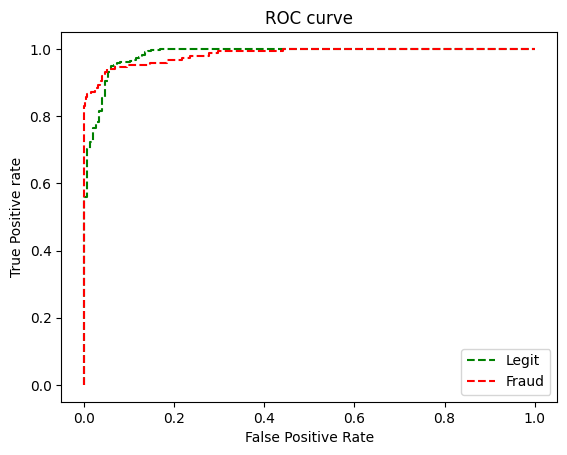

Model 1 performance updated.


,No,Model_Name,Acc,AUC,Legit_Precision,Fraud_Precision,Legit_Recal,Fraud_Recal,Legit_f1_Score,Fraud_f1_Score,Legit_Sample_Size,Fraud_Sample_Size,Total_Sample_Size
0,1,Logistic Regression,0.998993,0.763420,1.0,0.83,1.0,0.53,1.0,0.64,284315,492,284807
1,2,Decision Tree,0.999438,0.874936,1.0,0.91,1.0,0.75,1.0,0.82,284315,492,284807


In [169]:
use_thres_prob_max_fraud_recal = True

model_number = 1
model_name = "Logistic Regression"

# Get class probability scores
predict_prob = lg_model_pipe.predict_proba(x_test)

if use_thres_prob_max_fraud_recal:
    y_pred = (predict_prob >= thres_prob_max_fraud_recal).astype(int)  # convert probabilities to binary labels based on threshold
    y_pred = [i[1] for i in y_pred]
else:
    y_pred = lg_model_pipe.predict(x_test)

# To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(target_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predict_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label=target_classes[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label=target_classes[1])
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

all_models_performance = add_to_performance(numb=model_number, model_pipe=lg_model_pipe, _model_name=model_name, _x_test=x_test, _y_test=y_test, _data=data, _all_models_performance_df=all_models_performance)
all_models_performance

Without data transformation
Average AUC: 0.7584330580853614
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.53      0.64       148

### B. Decision Tree

Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.75      0.82       148

    accuracy                           1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



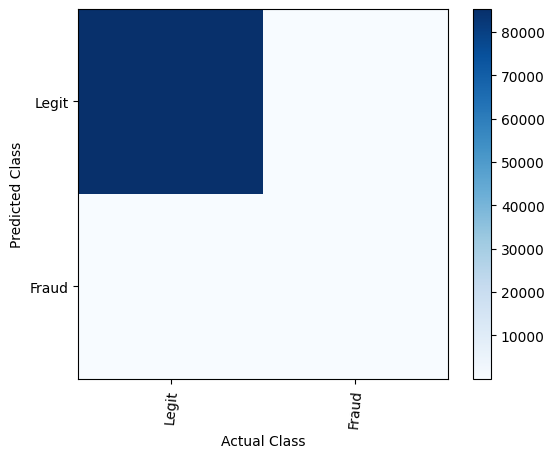

In [143]:
# Create a ColumnTransformer with the OneHotEncoder pipeline
column_transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), numeric_features_col_ind),
])

custom_transform_partial = partial(custom_transform, col_index_list=index_new_list_cols_high_potential)

# create a pipeline
dt_pipe = Pipeline([
    ('transform', FunctionTransformer(custom_transform_partial)),
    ('column_transformer', column_transformer),  
    # ('PCA', PCA(n_components=300)),
    ('clf', DecisionTreeClassifier()),  # criterion='gini',max_depth=5,random_state=1
])


# set parameters of the estimators in a pipeline
dt_param_grid = [
    {'clf__criterion':['gini','entropy'], 
     'clf__max_depth':list(range(1,20))}
]

# Apply GridSearch on the pipeline
dt_gs = GridSearchCV(dt_pipe, param_grid=dt_param_grid)


# train the model
dt_gs.fit(x_train, y_train)

dt_model_pipe = dt_gs.best_estimator_

# evaluate the model
# Print the accuracy
y_pred = dt_model_pipe.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

report = metrics.classification_report(y_test, y_pred)
print(report)
# plot_confusion_matrix(true_labels, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(target_classes))
plt.xticks(tick_marks, target_classes, rotation=85)
plt.yticks(tick_marks, target_classes)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

max_fraud_recal: 0.75, thres_prob_max_fraud_recal: 0.1, max_fraud_recal_auc: 0.8749179318834633


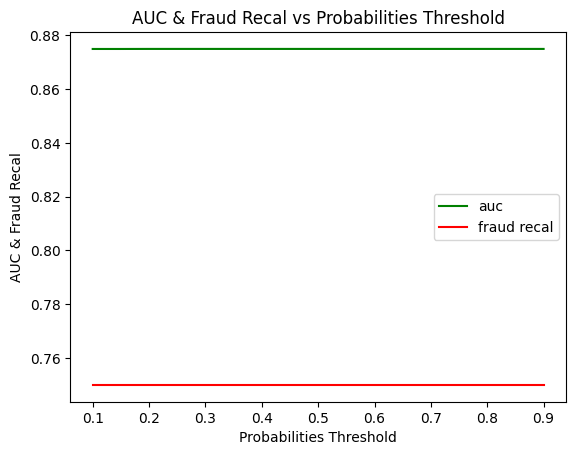

In [158]:
# Get class probability scores
predict_prob = dt_model_pipe.predict_proba(x_test)

list_thres_prob = [i / 100 for i in range(10, 91, 5)]
list_auc = []
list_fraud_recal = []

max_fraud_recal = 0
thres_prob_max_fraud_recal = None
max_fraud_recal_auc = 0
y_pred_max_fraud_recal = None

for thres_prob in list_thres_prob:
    y_pred = (predict_prob >= thres_prob).astype(int)  # convert probabilities to binary labels based on threshold
    y_pred = [i[1] for i in y_pred]  # 1 is for fraud. In the y_pred there are pairs of probabilities and the second one (index 1) is for fraud; that's why we have i[1]

    # To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
    auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
    
    _report = metrics.precision_recall_fscore_support(y_test, y_pred)
    
    _legit_precision, _fraud_precision = _report[0]
    _legit_precision, _fraud_precision = round(_legit_precision, 2), round(_fraud_precision, 2)
    
    _legit_recal, _fraud_recal = _report[1]
    _legit_recal, _fraud_recal = round(_legit_recal, 2), round(_fraud_recal, 2)
    
    # _legit_f1_score, _fraud_f1_score = _report[2]
    # _legit_f1_score, _fraud_f1_score = round(_legit_f1_score, 2), round(_fraud_f1_score, 2)
    
    list_auc.append(auc)
    list_fraud_recal.append(_fraud_recal)
    
    
    if _fraud_recal > max_fraud_recal:
        max_fraud_recal = _fraud_recal
        thres_prob_max_fraud_recal = thres_prob
        max_fraud_recal_auc = auc
        
print(f"max_fraud_recal: {max_fraud_recal}, thres_prob_max_fraud_recal: {thres_prob_max_fraud_recal}, max_fraud_recal_auc: {max_fraud_recal_auc}")

y_pred = (predict_prob >= thres_prob_max_fraud_recal).astype(int)  # convert probabilities to binary labels based on threshold
y_pred = [i[1] for i in y_pred]  # 1 is for fraud. In the y_pred there are pairs of probabilities and the second one (index 1) is for fraud; that's why we have i[1]

report = metrics.classification_report(y_test, y_pred)
print(report)

# Plot the ROC chart
plt.plot(list_thres_prob, list_auc, linestyle='-',color='green', label="auc")
plt.plot(list_thres_prob, list_fraud_recal, linestyle='-',color='red', label="fraud recal")
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('AUC & Fraud Recal vs Probabilities Threshold')
plt.xlabel('Probabilities Threshold')
plt.ylabel('AUC & Fraud Recal')
plt.legend(loc='best')
plt.show()


Average AUC: 0.8749179318834633


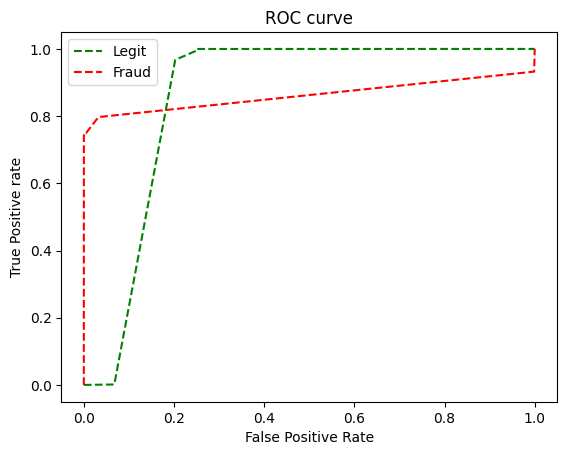

Model 2 performance updated.


,No,Model_Name,Acc,AUC,Legit_Precision,Fraud_Precision,Legit_Recal,Fraud_Recal,Legit_f1_Score,Fraud_f1_Score,Legit_Sample_Size,Fraud_Sample_Size,Total_Sample_Size
0,1,Logistic Regression,0.998993,0.763420,1.0,0.83,1.0,0.53,1.0,0.64,284315,492,284807
1,2,Decision Tree,0.999438,0.874936,1.0,0.91,1.0,0.75,1.0,0.82,284315,492,284807


In [170]:
use_thres_prob_max_fraud_recal = True


# Get class probability scores
predict_prob = dt_model_pipe.predict_proba(x_test)

if use_thres_prob_max_fraud_recal:
    y_pred = (predict_prob >= thres_prob_max_fraud_recal).astype(int)  # convert probabilities to binary labels based on threshold
    y_pred = [i[1] for i in y_pred]
else:
    y_pred = dt_model_pipe.predict(x_test)

# To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(target_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predict_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label=target_classes[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label=target_classes[1])
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


model_number = 2
model_name = "Decision Tree"
all_models_performance = add_to_performance(numb=model_number, model_pipe=dt_model_pipe, _model_name=model_name, _x_test=x_test, _y_test=y_test, _data=data, _all_models_performance_df=all_models_performance)
all_models_performance

### C.  Gradient Boosting

Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.56      0.69       148

    accuracy                           1.00     85443
   macro avg       0.95      0.78      0.85     85443
weighted avg       1.00      1.00      1.00     85443



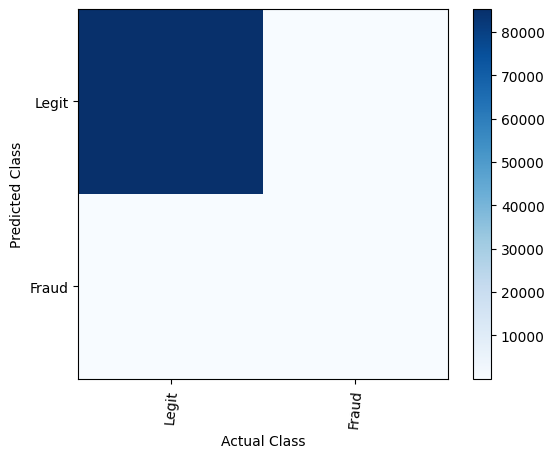

In [171]:
# Create a ColumnTransformer with the OneHotEncoder pipeline
column_transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), numeric_features_col_ind),
])


# create a pipeline
gb_pipe = Pipeline([
    ('column_transformer', column_transformer),  
    # ('PCA', PCA(n_components=300)),
    ('clf', GradientBoostingClassifier()),  # criterion='gini',max_depth=5,random_state=1
])


# set parameters of the estimators in a pipeline
gb_param_grid = [
    {'clf__n_estimators': [50],
    'clf__max_depth': [3]}
]

# Apply GridSearch on the pipeline
gb_gs = GridSearchCV(gb_pipe, param_grid=gb_param_grid)


# train the model
gb_gs.fit(x_train, y_train)

gb_model_pipe = gb_gs.best_estimator_

# evaluate the model
# Print the accuracy
y_pred = gb_model_pipe.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

report = metrics.classification_report(y_test, y_pred)
print(report)
# plot_confusion_matrix(true_labels, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(target_classes))
plt.xticks(tick_marks, target_classes, rotation=85)
plt.yticks(tick_marks, target_classes)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

max_fraud_recal: 0.64, thres_prob_max_fraud_recal: 0.1, max_fraud_recal_auc: 0.8174796374427068
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.64      0.73       148

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



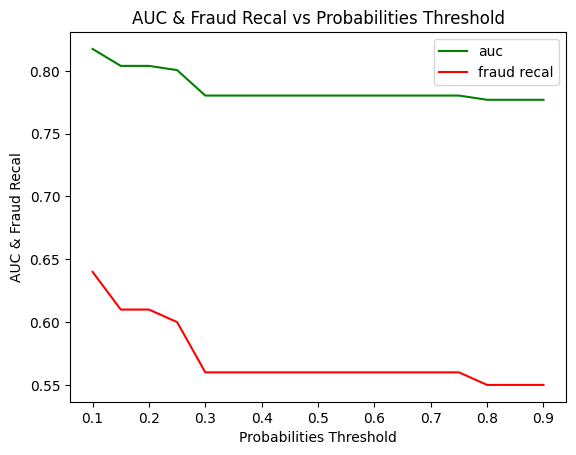

In [172]:
# Get class probability scores
predict_prob = gb_model_pipe.predict_proba(x_test)

list_thres_prob = [i / 100 for i in range(10, 91, 5)]
list_auc = []
list_fraud_recal = []

max_fraud_recal = 0
thres_prob_max_fraud_recal = None
max_fraud_recal_auc = 0
y_pred_max_fraud_recal = None

for thres_prob in list_thres_prob:
    y_pred = (predict_prob >= thres_prob).astype(int)  # convert probabilities to binary labels based on threshold
    y_pred = [i[1] for i in y_pred]  # 1 is for fraud. In the y_pred there are pairs of probabilities and the second one (index 1) is for fraud; that's why we have i[1]

    # To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
    auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
    
    _report = metrics.precision_recall_fscore_support(y_test, y_pred)
    
    _legit_precision, _fraud_precision = _report[0]
    _legit_precision, _fraud_precision = round(_legit_precision, 2), round(_fraud_precision, 2)
    
    _legit_recal, _fraud_recal = _report[1]
    _legit_recal, _fraud_recal = round(_legit_recal, 2), round(_fraud_recal, 2)
    
    # _legit_f1_score, _fraud_f1_score = _report[2]
    # _legit_f1_score, _fraud_f1_score = round(_legit_f1_score, 2), round(_fraud_f1_score, 2)
    
    list_auc.append(auc)
    list_fraud_recal.append(_fraud_recal)
    
    
    if _fraud_recal > max_fraud_recal:
        max_fraud_recal = _fraud_recal
        thres_prob_max_fraud_recal = thres_prob
        max_fraud_recal_auc = auc
        
print(f"max_fraud_recal: {max_fraud_recal}, thres_prob_max_fraud_recal: {thres_prob_max_fraud_recal}, max_fraud_recal_auc: {max_fraud_recal_auc}")

y_pred = (predict_prob >= thres_prob_max_fraud_recal).astype(int)  # convert probabilities to binary labels based on threshold
y_pred = [i[1] for i in y_pred]  # 1 is for fraud. In the y_pred there are pairs of probabilities and the second one (index 1) is for fraud; that's why we have i[1]

report = metrics.classification_report(y_test, y_pred)
print(report)

# Plot the ROC chart
plt.plot(list_thres_prob, list_auc, linestyle='-',color='green', label="auc")
plt.plot(list_thres_prob, list_fraud_recal, linestyle='-',color='red', label="fraud recal")
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('AUC & Fraud Recal vs Probabilities Threshold')
plt.xlabel('Probabilities Threshold')
plt.ylabel('AUC & Fraud Recal')
plt.legend(loc='best')
plt.show()


Average AUC: 0.8174796374427068


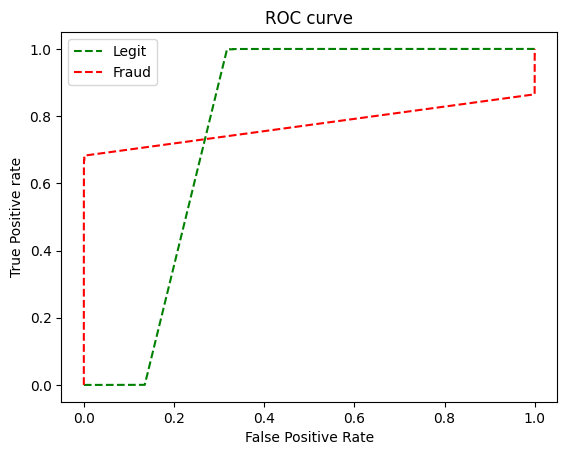

Model 3 performance updated.


,No,Model_Name,Acc,AUC,Legit_Precision,Fraud_Precision,Legit_Recal,Fraud_Recal,Legit_f1_Score,Fraud_f1_Score,Legit_Sample_Size,Fraud_Sample_Size,Total_Sample_Size
0,1,Logistic Regression,0.998993,0.763420,1.0,0.83,1.0,0.53,1.0,0.64,284315,492,284807
1,2,Decision Tree,0.999438,0.874936,1.0,0.91,1.0,0.75,1.0,0.82,284315,492,284807
2,3,Gradient Boosting Classifier,0.999134,0.780353,1.0,0.90,1.0,0.56,1.0,0.69,284315,492,284807


In [174]:
use_thres_prob_max_fraud_recal = False

# Get class probability scores
predict_prob = gb_model_pipe.predict_proba(x_test)

if use_thres_prob_max_fraud_recal:
    y_pred = (predict_prob >= thres_prob_max_fraud_recal).astype(int)  # convert probabilities to binary labels based on threshold
    y_pred = [i[1] for i in y_pred]
else:
    y_pred = dt_model_pipe.predict(x_test)

# To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(target_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predict_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label=target_classes[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label=target_classes[1])
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


model_number = 3
model_name = "Gradient Boosting Classifier"
all_models_performance = add_to_performance(numb=model_number, model_pipe=gb_model_pipe, _model_name=model_name, _x_test=x_test, _y_test=y_test, _data=data, _all_models_performance_df=all_models_performance)
all_models_performance

### D. Random Forest

In [177]:
# Create a ColumnTransformer with the OneHotEncoder pipeline
column_transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), numeric_features_col_ind),
])


# create a pipeline
rf_pipe = Pipeline([
    ('column_transformer', column_transformer),  
    # ('PCA', PCA(n_components=300)),
    ('clf', RandomForestClassifier(random_state=1)),  # criterion='gini',max_depth=5,random_state=1
])


# set parameters of the estimators in a pipeline
rf_param_grid = [
    {'clf__criterion':['gini','entropy'], 
     'clf__max_depth':list(range(1,28)),
     'clf__n_estimators': [20, 50, 80],
     'clf__min_samples_split': [10, 20, 40]}
]

# Apply GridSearch on the pipeline
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_param_grid)


# train the model
rf_gs.fit(x_train, y_train)

rf_model_pipe = rf_gs.best_estimator_

# evaluate the model
# Print the accuracy
y_pred = rf_model_pipe.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

report = metrics.classification_report(y_test, y_pred)
print(report)
# plot_confusion_matrix(true_labels, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(target_classes))
plt.xticks(tick_marks, target_classes, rotation=85)
plt.yticks(tick_marks, target_classes)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [ ]:
# Get class probability scores
predict_prob = rf_model_pipe.predict_proba(x_test)

# To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(target_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predict_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label=target_classes[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label=target_classes[1])
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

model_number = 3
model_name = "Random Forest"
all_models_performance = add_to_performance(numb=model_number, model_pipe=rf_model_pipe, _model_name=model_name, _x_test=x_test, _y_test=y_test, _data=data, _all_models_performance_df=all_models_performance)
all_models_performance

### Deep Learning with TensorFlow

## 2. Down Sampling -------------------------------------------------------------------------

In [23]:
fraud_size = df[df['Class']==1].shape[0]
new_legit_set_size = fraud_size*2
new_legit_set = df[df['Class']==0].sample(new_legit_set_size)
fraud_set = df[df['Class']==1]
new_data = pd.concat([new_legit_set,fraud_set], axis = 0)
print(new_data.groupby('Class').count())

       Time   V1   V2   V3   V4   V5   V6   V7   V8   V9  ...  V20  V21  V22  \
Class                                                     ...                  
0       984  984  984  984  984  984  984  984  984  984  ...  984  984  984   
1       492  492  492  492  492  492  492  492  492  492  ...  492  492  492   

       V23  V24  V25  V26  V27  V28  Amount  
Class                                        
0      984  984  984  984  984  984     984  
1      492  492  492  492  492  492     492  

[2 rows x 30 columns]


Split train test

In [24]:
# preprocess the data
target_classes = ['Legit', 'Fraud']
# data.dropna(inplace=True) # remove rows with missing values
data = new_data.copy(deep=True)
features = data.columns[0:-1]
# features = list_cols_high_potential.copy()
label = 'Class'
categorical_columns = []
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(data[features].values,
                                                    data[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")
print(f"There is (are) {np.sum(y_test)} fraud(s) in the test set")

numeric_features_col_ind = [list(features).index(col) for col in features if col not in categorical_columns]
category_features_col_ind = [list(features).index(col) for col in categorical_columns]

print('Ready...')


Training Set: 1033, Test Set: 443 

Sample of features and labels:
There is (are) 156 fraud(s) in the test set
Ready...


### A. Logistic regression

Accuracy: 0.928
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       287
           1       0.99      0.80      0.89       156

    accuracy                           0.93       443
   macro avg       0.95      0.90      0.92       443
weighted avg       0.93      0.93      0.93       443



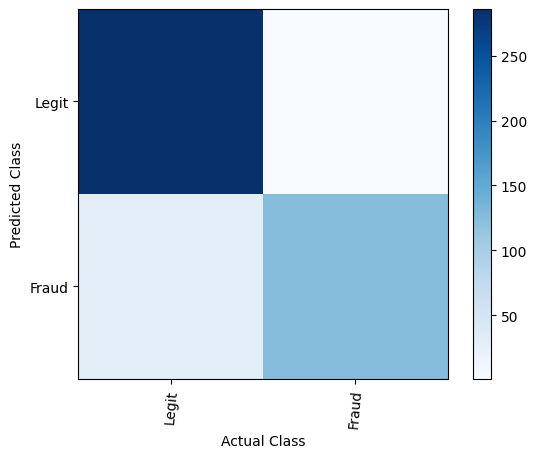

In [25]:
# Create a ColumnTransformer with the OneHotEncoder pipeline
column_transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), numeric_features_col_ind),
])


custom_transform_partial = partial(custom_transform, col_index_list=index_new_list_cols_high_potential)

# create a pipeline
lg_pipe = Pipeline([
    ('transform', FunctionTransformer(custom_transform_partial)),
    ('column_transformer', column_transformer),  
    # ('PCA', PCA(n_components=300)),
    ('lg', LogisticRegression(tol=0.0001, max_iter=1000)),  # criterion='gini',max_depth=5,random_state=1
])


# set parameters of the estimators in a pipeline
lg_param_grid = [
    {'lg__C':[1, 1/10, 1/100, 1/1000], 
     'lg__solver':['liblinear','newton-cg', 'lbfgs', 'sag', 'saga']}
]

# Apply GridSearch on the pipeline
lg_gs = GridSearchCV(lg_pipe, param_grid=lg_param_grid, cv=5)


# train the model
lg_gs.fit(x_train, y_train)

lg_model_pipe = lg_gs.best_estimator_

# evaluate the model
# Print the accuracy
y_pred = lg_model_pipe.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

report = metrics.classification_report(y_test, y_pred)
print(report)
# plot_confusion_matrix(true_labels, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(target_classes))
plt.xticks(tick_marks, target_classes, rotation=85)
plt.yticks(tick_marks, target_classes)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

Average AUC: 0.89889886536228


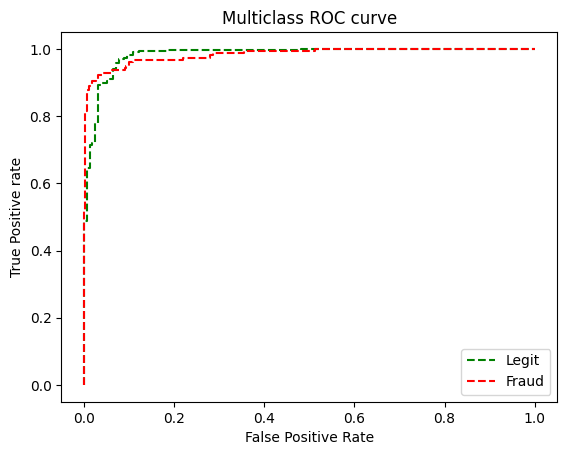

New performance added.


/tmp/ipykernel_46067/1112693356.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_m_p = all_m_p.append(new_model, ignore_index = True)


,No,Model_Name,Acc,AUC,Legit_Precision,Fraud_Precision,Legit_Recal,Fraud_Recal,Legit_f1_Score,Fraud_f1_Score,Legit_Sample_Size,Fraud_Sample_Size,Total_Sample_Size
0,4,Logistic Regression,0.927765,0.898899,0.9,0.99,1.0,0.8,0.95,0.89,984,492,1476


In [26]:
# Get class probability scores
predict_prob = lg_model_pipe.predict_proba(x_test)

# To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(target_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predict_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label=target_classes[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label=target_classes[1])
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

model_number = 4
model_name = "Logistic Regression"
all_models_performance = add_to_performance(numb=model_number, model_pipe=lg_model_pipe, _model_name=model_name, _x_test=x_test, _y_test=y_test, _data=data, _all_models_performance_df=all_models_performance)
all_models_performance


Average AUC: 0.9006410256410257

Accuracy: 0.930
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       287
           1       1.00      0.80      0.89       156

    accuracy                           0.93       443
   macro avg       0.95      0.90      0.92       443
weighted avg       0.94      0.93      0.93       443

### B. Decision Tree

Accuracy: 0.944
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       287
           1       0.99      0.85      0.91       156

    accuracy                           0.94       443
   macro avg       0.96      0.92      0.94       443
weighted avg       0.95      0.94      0.94       443



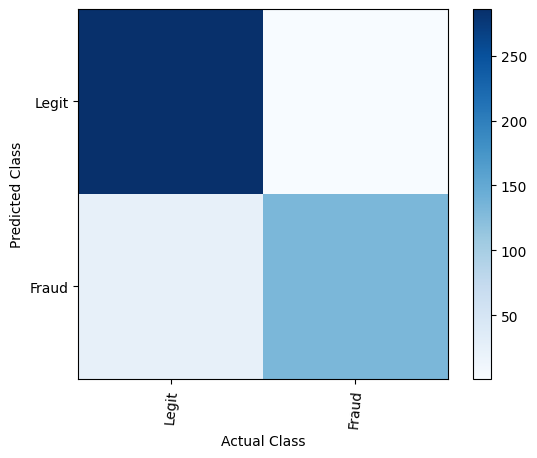

In [27]:
# Create a ColumnTransformer with the OneHotEncoder pipeline
column_transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), numeric_features_col_ind),
])

custom_transform_partial = partial(custom_transform, col_index_list=index_new_list_cols_high_potential)

# create a pipeline
dt_pipe = Pipeline([
    ('transform', FunctionTransformer(custom_transform_partial)),
    ('column_transformer', column_transformer),  
    # ('PCA', PCA(n_components=300)),
    ('clf', DecisionTreeClassifier()),  # criterion='gini',max_depth=5,random_state=1
])


# set parameters of the estimators in a pipeline
dt_param_grid = [
    {'clf__criterion':['gini','entropy'], 
     'clf__max_depth':list(range(1,20))}
]

# Apply GridSearch on the pipeline
dt_gs = GridSearchCV(dt_pipe, param_grid=dt_param_grid)


# train the model
dt_gs.fit(x_train, y_train)

dt_model_pipe = dt_gs.best_estimator_

# evaluate the model
# Print the accuracy
y_pred = dt_model_pipe.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

report = metrics.classification_report(y_test, y_pred)
print(report)
# plot_confusion_matrix(true_labels, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(target_classes))
plt.xticks(tick_marks, target_classes, rotation=85)
plt.yticks(tick_marks, target_classes)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

Average AUC: 0.9213347627981775


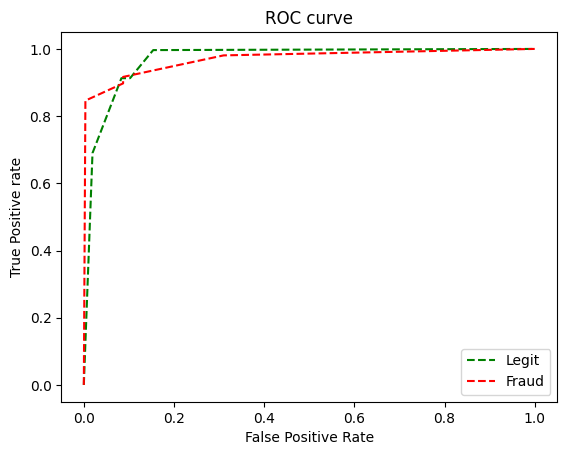

New performance added.


/tmp/ipykernel_46067/1112693356.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_m_p = all_m_p.append(new_model, ignore_index = True)


,No,Model_Name,Acc,AUC,Legit_Precision,Fraud_Precision,Legit_Recal,Fraud_Recal,Legit_f1_Score,Fraud_f1_Score,Legit_Sample_Size,Fraud_Sample_Size,Total_Sample_Size
0,4,Logistic Regression,0.927765,0.898899,0.90,0.99,1.0,0.80,0.95,0.89,984,492,1476
1,6,Decision Tree,0.943567,0.921335,0.92,0.99,1.0,0.85,0.96,0.91,984,492,1476


In [28]:
# Get class probability scores
predict_prob = dt_model_pipe.predict_proba(x_test)

# To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(target_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predict_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label=target_classes[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label=target_classes[1])
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


model_number = 6
model_name = "Decision Tree"
all_models_performance = add_to_performance(numb=model_number, model_pipe=dt_model_pipe, _model_name=model_name, _x_test=x_test, _y_test=y_test, _data=data, _all_models_performance_df=all_models_performance)
all_models_performance

Average AUC: 0.9248860895202358

Accuracy: 0.937
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       287
           1       0.93      0.88      0.91       156

    accuracy                           0.94       443
   macro avg       0.94      0.92      0.93       443
weighted avg       0.94      0.94      0.94       443

### C. Random Forest

Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       287
           1       0.99      0.88      0.93       156

    accuracy                           0.95       443
   macro avg       0.97      0.94      0.95       443
weighted avg       0.96      0.95      0.95       443



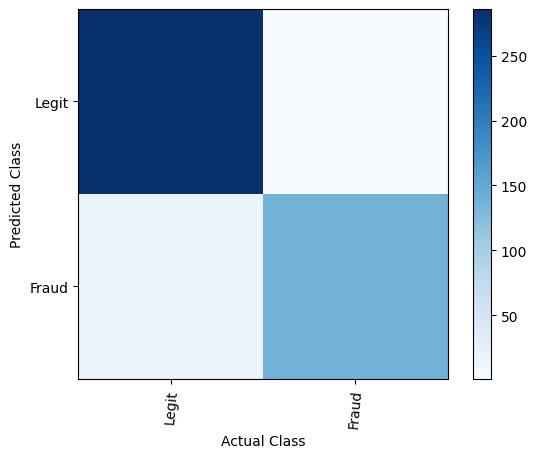

In [29]:
# Create a ColumnTransformer with the OneHotEncoder pipeline
column_transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), numeric_features_col_ind),
])

custom_transform_partial = partial(custom_transform, col_index_list=index_new_list_cols_high_potential)

# create a pipeline
rf_pipe = Pipeline([
    ('transform', FunctionTransformer(custom_transform_partial)),
    ('column_transformer', column_transformer),  
    # ('PCA', PCA(n_components=300)),
    ('clf', RandomForestClassifier(random_state=1)),  # criterion='gini',max_depth=5,random_state=1
])


# set parameters of the estimators in a pipeline
rf_param_grid = [
    {'clf__criterion':['gini','entropy'], 
     'clf__max_depth':list(range(1,28)),
     'clf__n_estimators': [20, 50, 80],
     'clf__min_samples_split': [10, 20, 40]}
]

# Apply GridSearch on the pipeline
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_param_grid)


# train the model
rf_gs.fit(x_train, y_train)

rf_model_pipe = rf_gs.best_estimator_

# evaluate the model
# Print the accuracy
y_pred = rf_model_pipe.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

report = metrics.classification_report(y_test, y_pred)
print(report)
# plot_confusion_matrix(true_labels, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(target_classes))
plt.xticks(tick_marks, target_classes, rotation=85)
plt.yticks(tick_marks, target_classes)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

Average AUC: 0.9373604038238185


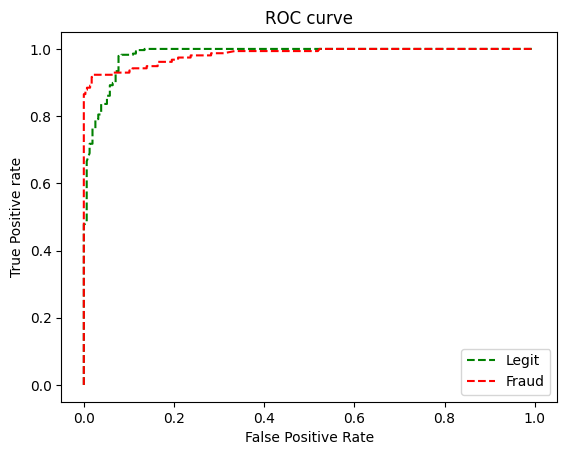

New performance added.


/tmp/ipykernel_46067/1112693356.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_m_p = all_m_p.append(new_model, ignore_index = True)


,No,Model_Name,Acc,AUC,Legit_Precision,Fraud_Precision,Legit_Recal,Fraud_Recal,Legit_f1_Score,Fraud_f1_Score,Legit_Sample_Size,Fraud_Sample_Size,Total_Sample_Size
0,4,Logistic Regression,0.927765,0.898899,0.90,0.99,1.0,0.80,0.95,0.89,984,492,1476
1,6,Decision Tree,0.943567,0.921335,0.92,0.99,1.0,0.85,0.96,0.91,984,492,1476
2,7,Random Forest,0.954853,0.937360,0.94,0.99,1.0,0.88,0.97,0.93,984,492,1476


In [30]:
# Get class probability scores
predict_prob = rf_model_pipe.predict_proba(x_test)

# To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(target_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predict_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label=target_classes[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label=target_classes[1])
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

model_number = 7
model_name = "Random Forest"
all_models_performance = add_to_performance(numb=model_number, model_pipe=rf_model_pipe, _model_name=model_name, _x_test=x_test, _y_test=y_test, _data=data, _all_models_performance_df=all_models_performance)
all_models_performance

Average AUC: 0.9370812114714554

Accuracy: 0.953
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       287
           1       0.98      0.88      0.93       156

    accuracy                           0.95       443
   macro avg       0.96      0.94      0.95       443
weighted avg       0.95      0.95      0.95       443

### D. Support Vector Machine

Accuracy: 0.944
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       287
           1       0.99      0.85      0.91       156

    accuracy                           0.94       443
   macro avg       0.96      0.92      0.94       443
weighted avg       0.95      0.94      0.94       443



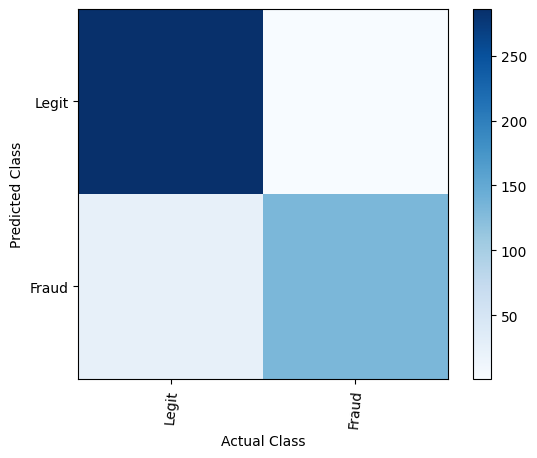

In [31]:
# Create a ColumnTransformer with the OneHotEncoder pipeline
column_transformer = ColumnTransformer([
    ("scaler", MinMaxScaler(), numeric_features_col_ind),
])

custom_transform_partial = partial(custom_transform, col_index_list=index_new_list_cols_high_potential)

# create a pipeline
rf_pipe = Pipeline([
    ('transform', FunctionTransformer(custom_transform_partial)),
    ('column_transformer', column_transformer),  
    # ('PCA', PCA(n_components=300)),
    ('clf', SVC(probability=True)),  # criterion='gini',max_depth=5,random_state=1
])


# set parameters of the estimators in a pipeline
rf_param_grid = [
    {'clf__kernel':['linear', 'rbf'],
     'clf__C':[1, 1/10, 1/100, 1/1000], 
     'clf__gamma':[1, 1/10, 1/100, 1/1000],}
]

# Apply GridSearch on the pipeline
svc_gs = GridSearchCV(rf_pipe, param_grid=rf_param_grid)


# train the model
svc_gs.fit(x_train, y_train)

svc_model_pipe = svc_gs.best_estimator_

# evaluate the model
# Print the accuracy
y_pred = svc_model_pipe.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

report = metrics.classification_report(y_test, y_pred)
print(report)
# plot_confusion_matrix(true_labels, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(target_classes))
plt.xticks(tick_marks, target_classes, rotation=85)
plt.yticks(tick_marks, target_classes)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

Average AUC: 0.9213347627981775


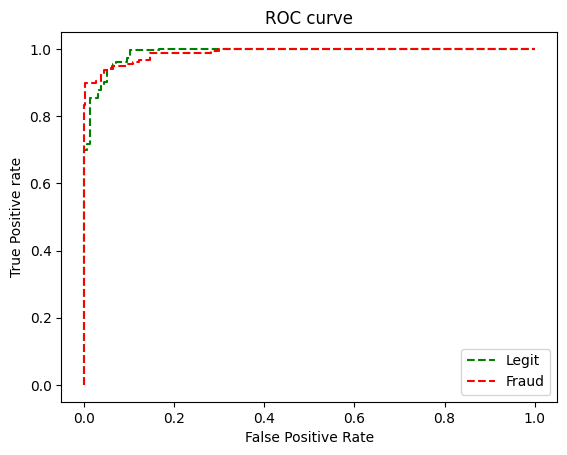

New performance added.


/tmp/ipykernel_46067/1112693356.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_m_p = all_m_p.append(new_model, ignore_index = True)


,No,Model_Name,Acc,AUC,Legit_Precision,Fraud_Precision,Legit_Recal,Fraud_Recal,Legit_f1_Score,Fraud_f1_Score,Legit_Sample_Size,Fraud_Sample_Size,Total_Sample_Size
0,4,Logistic Regression,0.927765,0.898899,0.90,0.99,1.0,0.80,0.95,0.89,984,492,1476
1,6,Decision Tree,0.943567,0.921335,0.92,0.99,1.0,0.85,0.96,0.91,984,492,1476
2,7,Random Forest,0.954853,0.937360,0.94,0.99,1.0,0.88,0.97,0.93,984,492,1476
3,8,Support Vector Machine,0.943567,0.921335,0.92,0.99,1.0,0.85,0.96,0.91,984,492,1476


In [32]:
# Get class probability scores
predict_prob = svc_model_pipe.predict_proba(x_test)

# To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(target_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predict_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label=target_classes[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label=target_classes[1])
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

model_number = 8
model_name = "Support Vector Machine"
all_models_performance = add_to_performance(numb=model_number, model_pipe=svc_model_pipe, _model_name=model_name, _x_test=x_test, _y_test=y_test, _data=data, _all_models_performance_df=all_models_performance)
all_models_performance

Average AUC: 0.9166666666666667

Accuracy: 0.941
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       287
           1       1.00      0.83      0.91       156

    accuracy                           0.94       443
   macro avg       0.96      0.92      0.93       443
weighted avg       0.95      0.94      0.94       443

### E. KNeighborsClassifier

Accuracy: 0.937
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       287
           1       0.96      0.86      0.91       156

    accuracy                           0.94       443
   macro avg       0.94      0.92      0.93       443
weighted avg       0.94      0.94      0.94       443



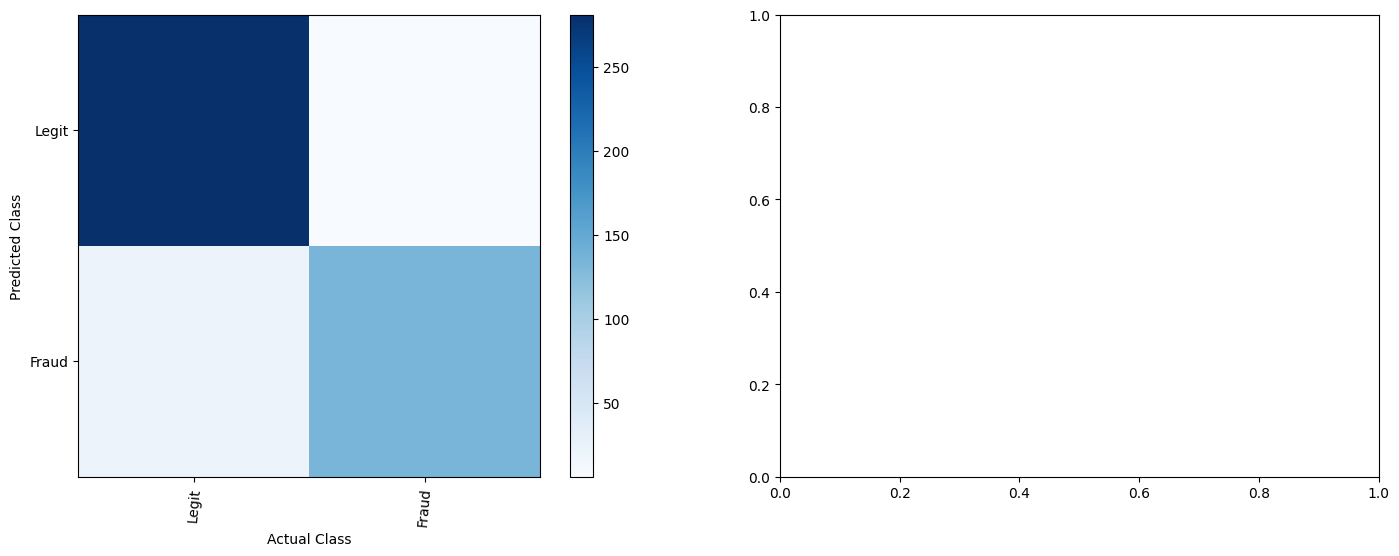

In [47]:
list_of_scaler = [MinMaxScaler(), ]
for scaler in list_of_scaler:
    # Create a ColumnTransformer with the OneHotEncoder pipeline
    column_transformer = ColumnTransformer([
        ("scaler", MinMaxScaler(), numeric_features_col_ind),
    ])

    custom_transform_partial = partial(custom_transform, col_index_list=index_new_list_cols_high_potential)

    # create a pipeline
    knn_pipe = Pipeline([
        ('transform', FunctionTransformer(custom_transform_partial)),
        ('column_transformer', column_transformer),  
        # ('PCA', PCA(n_components=300)),
        ('knn', KNeighborsClassifier()), 
    ])


    # set parameters of the estimators in a pipeline
    knn_param_grid = [
        {'knn__n_neighbors':list(range(2, 21))}
    ]

    # Apply GridSearch on the pipeline
    knn_gs = GridSearchCV(knn_pipe, param_grid=knn_param_grid, cv=10)


    # train the model
    knn_gs.fit(x_train, y_train)

    knn_model_pipe = knn_gs.best_estimator_
    
    auc = roc_auc_score(y_test, y_pred)

# evaluate the model
# Print the accuracy
y_pred = knn_model_pipe.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
report = metrics.classification_report(y_test, y_pred)

print('Accuracy: %.3f' % acc)
print(report)
# plot_confusion_matrix(true_labels, y_pred)

# Plot the confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
cm = confusion_matrix(y_test, y_pred)
im = axes[0].imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt. colorbar(im, ax=axes[0])
tick_marks = np.arange(len(target_classes))
axes[0].set_xticks(tick_marks, target_classes, rotation=85)
axes[0].set_yticks(tick_marks, target_classes)
axes[0].set_xlabel("Actual Class")
axes[0].set_ylabel("Predicted Class")


plt.show()

In [48]:
knn_gs.cv_results_

{'mean_fit_time': array([0.00276015, 0.00265176, 0.00212307, 0.00243683, 0.00270939,
        0.00272977, 0.00288835, 0.00272424, 0.00274918, 0.00290492,
        0.0025001 , 0.00314667, 0.00293806, 0.00291605, 0.00265508,
        0.00270741, 0.00256598, 0.00227358, 0.00242693]),
 'std_fit_time': array([7.15532309e-04, 5.78852521e-04, 7.47722477e-05, 4.68759567e-04,
        5.60986636e-04, 1.22257702e-04, 2.58495469e-04, 1.11882249e-04,
        2.32625863e-04, 6.20856679e-04, 3.84470696e-04, 6.68390559e-04,
        5.41525745e-04, 4.31413683e-04, 9.76489156e-05, 6.32470712e-04,
        3.81171516e-04, 2.08971143e-04, 4.61400002e-04]),
 'mean_score_time': array([0.01663773, 0.00803339, 0.01097031, 0.0070246 , 0.00780783,
        0.00910518, 0.00705369, 0.02597802, 0.02650337, 0.01543665,
        0.00660405, 0.0196198 , 0.01409531, 0.01290982, 0.0085458 ,
        0.00870345, 0.0072031 , 0.01401813, 0.02107048]),
 'std_score_time': array([0.02608435, 0.00364583, 0.00794053, 0.00238247, 0.00

In [49]:
knn_model_pipe.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('transform',
                 FunctionTransformer(func=functools.partial(<function custom_transform at 0x7fd45d87dc60>, col_index_list=[21, 27]))),
                ('column_transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])>

Average AUC: 0.9190342178147055


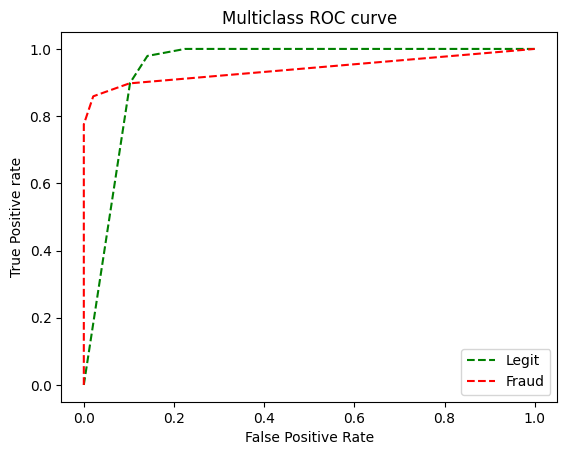

New performance added.


/tmp/ipykernel_149759/1112693356.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_m_p = all_m_p.append(new_model, ignore_index = True)


,No,Model_Name,Acc,AUC,Legit_Precision,Fraud_Precision,Legit_Recal,Fraud_Recal,Legit_f1_Score,Fraud_f1_Score,Legit_Sample_Size,Fraud_Sample_Size,Total_Sample_Size
0,4,Logistic Regression,0.934537,0.908514,0.91,0.99,1.00,0.82,0.95,0.90,984,492,1476
1,6,Decision Tree,0.932280,0.909698,0.92,0.97,0.99,0.83,0.95,0.90,984,492,1476
2,7,Random Forest,0.950339,0.932413,0.93,0.99,0.99,0.87,0.96,0.93,984,492,1476
3,8,Support Vector Machine,0.939052,0.914925,0.92,0.99,1.00,0.83,0.95,0.91,984,492,1476
4,10,KNeighborsRegressor,0.936795,0.919034,0.93,0.96,0.98,0.86,0.95,0.91,984,492,1476


In [50]:
# Get class probability scores
predict_prob = knn_model_pipe.predict_proba(x_test)

# To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.
auc = roc_auc_score(y_test, y_pred)  # , multi_class='ovr'
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(target_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, predict_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label=target_classes[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label=target_classes[1])
# plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=decision_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

model_number = 10
model_name = "KNeighbors Classifier"
all_models_performance = add_to_performance(numb=model_number, model_pipe=knn_model_pipe, _model_name=model_name, _x_test=x_test, _y_test=y_test, _data=data, _all_models_performance_df=all_models_performance)
all_models_performance

Save all_models_performance as csv

In [18]:
all_models_performance_relat_path = os.path.join("outputs", "csv", "all_models_performance.csv")
# all_models_performance = pd.read_csv(all_models_performance_relat_path)
all_models_performance.to_csv(all_models_performance_relat_path, index=False)
print(f"all_models_performance save At: {all_models_performance_relat_path}")

all_models_performance save At: outputs/csv/all_models_performance.csv


### Compare the models

In [3]:
def generate_n_colors(n):
    """
    Generate n different colors
    
    """
    import colorsys

    # Generate a list of n equidistant values between 0 and 1
    hue_values = [i / n for i in range(n)]
    # Set saturation and value to 1 (full color)
    saturation = 1
    value = 1
    # Convert each hue value to an RGB color and add to a list
    colors = []
    for hue in hue_values:
        rgb = colorsys.hsv_to_rgb(hue, saturation, value)
        colors.append(rgb)
    return colors


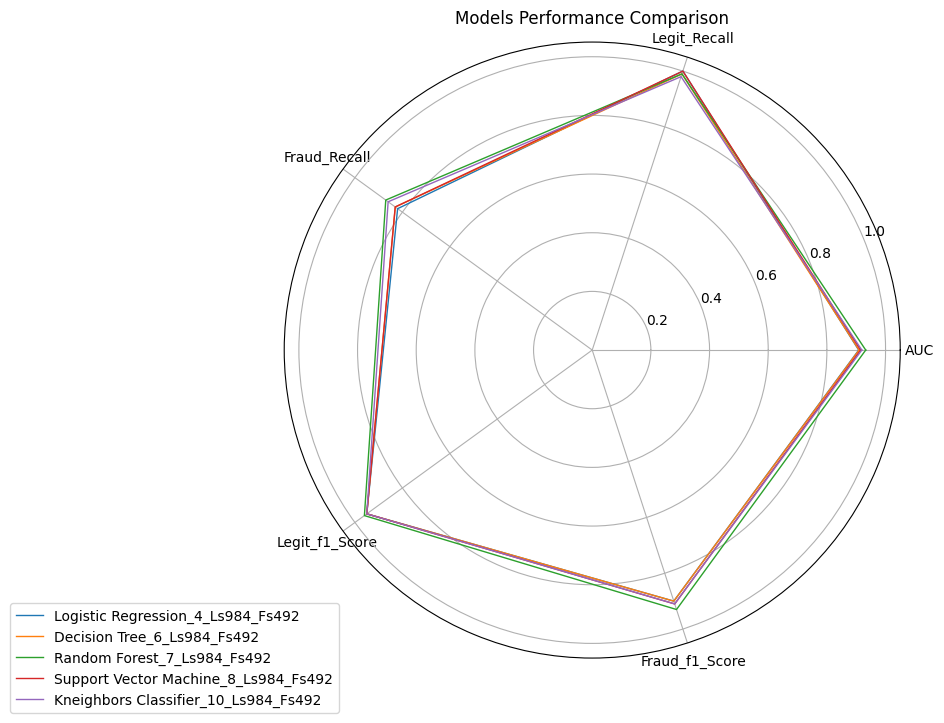

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create sample data
# cols_plot_radar = ['Model_Name', 'Acc', 'AUC', 'Legit_Precision', 'Fraud_Precision', 'Legit_Recall', 'Fraud_Recall', 'Legit_f1_Score', 'Fraud_f1_Score']
cols_plot_radar = ['Model_Name', 'AUC', 'Legit_Recall', 'Fraud_Recall', 'Legit_f1_Score', 'Fraud_f1_Score']
expl_df = all_models_performance.copy()
expl_df['Model_Name'] = expl_df['Model_Name']+'_'+expl_df['No'].astype(str)+'_Ls'+expl_df['Legit_Sample_Size'].astype(str)+'_Fs'+expl_df['Fraud_Sample_Size'].astype(str)
expl_df = expl_df[cols_plot_radar]
expl_df = expl_df.tail(5).reset_index(drop=True)


# number of variables
categories=list(expl_df)[1:]
N = len(categories)
colors_list = generate_n_colors(n=expl_df.shape[0])

# create angles for the radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Create a figure and axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, polar=True)

for ind, row in expl_df.iterrows():
    _color = colors_list[ind]
    # create radar chart for group A
    values = expl_df.loc[ind].drop('Model_Name').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=row['Model_Name'])
    ax.fill(angles, values, _color, alpha=0.0)

# # create radar chart for group B
# values = expl_df.loc[1].drop('Model_Name').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="Group B")
# ax.fill(angles, values, 'orange', alpha=0.1)

# Set the labels and title
# ax.set_thetagrids(angles[:-1] * 180 / np.pi, categories)
ax.set_thetagrids([a * 180 / np.pi for a in angles[:-1]], categories)
# ax.set_title('Radar Chart Example')

# add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Models Performance Comparison')

# show the plot
plt.show()

fig.savefig(os.path.join("outputs", "images", "Models_Performance_Comparison.png"))


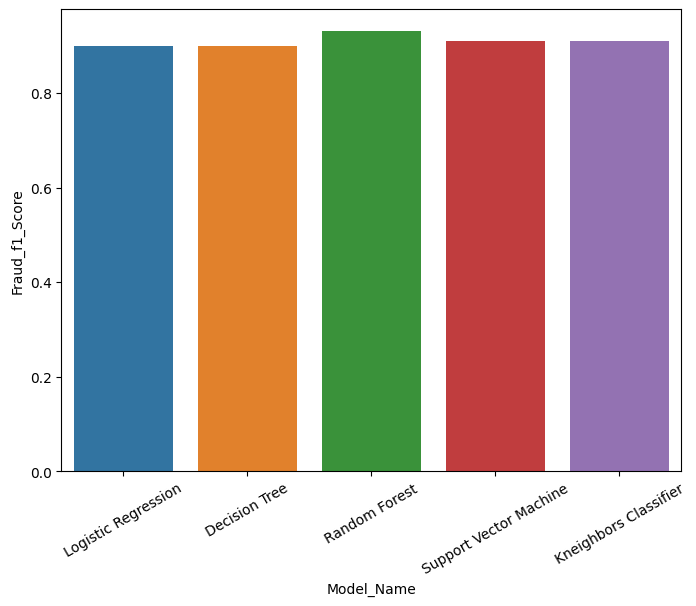

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
sns.barplot(data=all_models_performance, x="Model_Name", y="Fraud_f1_Score", ax=ax)
ax.tick_params(axis='x', rotation=30)
plt.show()

In [57]:
df

,Category,Value,Percent
0,Cat A,4,80.0
1,Cat B,3,60.0
2,Cat C,5,100.0
3,Cat D,1,20.0
4,Cat E,2,40.0
0,Cat A,4,80.0


## 3. Comparison

In [12]:
def generate_n_colors(n):
    """
    Generate n different colors
    
    """
    import colorsys

    # Generate a list of n equidistant values between 0 and 1
    hue_values = [i / n for i in range(n)]
    # Set saturation and value to 1 (full color)
    saturation = 1
    value = 1
    # Convert each hue value to an RGB color and add to a list
    colors = []
    for hue in hue_values:
        rgb = colorsys.hsv_to_rgb(hue, saturation, value)
        colors.append(rgb)
    return colors


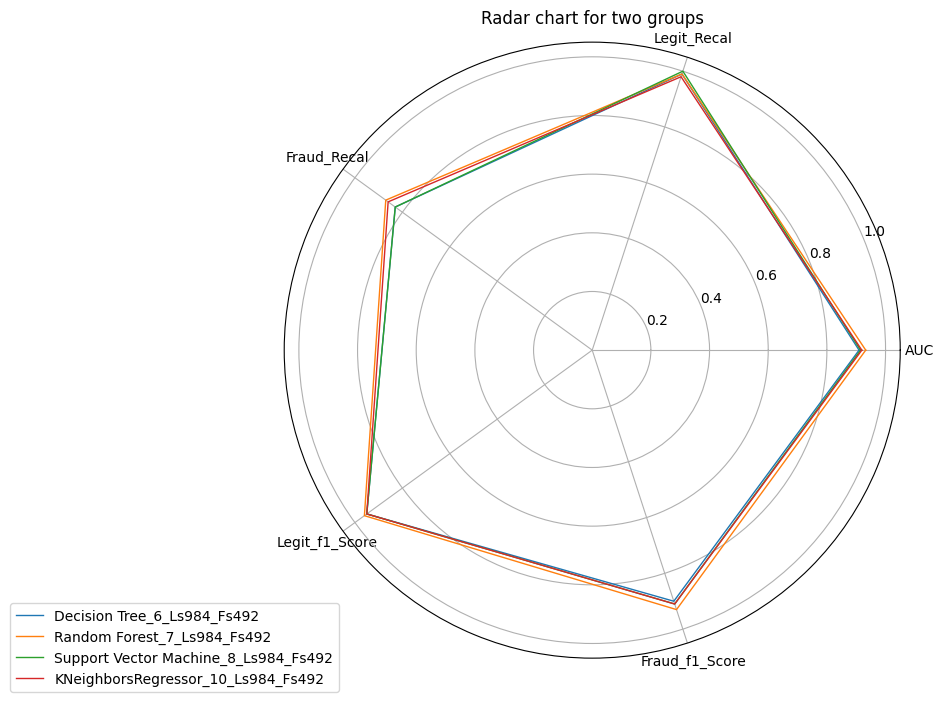

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create sample data
# cols_plot_radar = ['Model_Name', 'Acc', 'AUC', 'Legit_Precision', 'Fraud_Precision', 'Legit_Recall', 'Fraud_Recall', 'Legit_f1_Score', 'Fraud_f1_Score']
cols_plot_radar = ['Model_Name', 'AUC', 'Legit_Recall', 'Fraud_Recall', 'Legit_f1_Score', 'Fraud_f1_Score']
expl_df = all_models_performance.copy()
expl_df['Model_Name'] = expl_df['Model_Name']+'_'+expl_df['No'].astype(str)+'_Ls'+expl_df['Legit_Sample_Size'].astype(str)+'_Fs'+expl_df['Fraud_Sample_Size'].astype(str)
expl_df = expl_df[cols_plot_radar]
expl_df = expl_df.tail(4).reset_index(drop=True)


# number of variables
categories=list(expl_df)[1:]
N = len(categories)
colors_list = generate_n_colors(n=expl_df.shape[0])

# create angles for the radar chart
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Create a figure and axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

for ind, row in expl_df.iterrows():
    _color = colors_list[ind]
    # create radar chart for group A
    values = expl_df.loc[ind].drop('Model_Name').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=row['Model_Name'])
    ax.fill(angles, values, _color, alpha=0.0)

# Set the labels and title
# ax.set_thetagrids(angles[:-1] * 180 / np.pi, categories)
ax.set_thetagrids([a * 180 / np.pi for a in angles[:-1]], categories)
# ax.set_title('Radar Chart Example')

# add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar chart for two groups')

# show the plot
plt.show()


In [ ]:
expl_df

,index,Model_Name,AUC,Legit_Precision,Fraud_Precision,Legit_Recal,Fraud_Recal
0,3,Decision Tree_6_Ls984_Fs492,0.924540,0.93,0.99,1.0,0.85
1,4,Random Forest_7_Ls984_Fs492,0.934155,0.93,0.99,1.0,0.87
2,5,Support Vector Machine_8_Ls984_Fs492,0.923077,0.92,1.00,1.0,0.85
3,6,KNeighborsRegressor_10_Ls984_Fs492,0.910256,0.91,1.00,1.0,0.82


In [87]:
import os

In [90]:
joblib.dump(dt_model_pipe, os.path.join('models', f'{model_name}_Legit_Sample_Size_284315_Fraud_Sample_Size_283884_duplicated.joblib'))
print('Model saved!')

Model saved!
